In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np


In [2]:
# import the data

data_path = "Mouse_metadata.csv"
results_path = "Study_results.csv"

In [3]:
# read the data

mouse_data = pd.read_csv(data_path)
study_results = pd.read_csv(results_path)

In [4]:
# combine the two data sets into one using the Mouse ID

combined = pd.merge(mouse_data, study_results, on = "Mouse ID", how = "outer")
combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# count the mice

num = pd.DataFrame({"Duplicated Mouse ID" : [clean['Mouse ID'].nunique()]})
num.set_index('Duplicated Mouse ID', inplace=True)

num

""
Duplicated Mouse ID
248


In [5]:
# check the data for any mouse ID with duplicate time points

dups = combined.loc[combined.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

dups

array(['g989'], dtype=object)

In [6]:
# look at duplicate mouse data

dup_data = combined.loc[combined['Mouse ID'] == 'g989']

dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# remove duplicate mouse data

clean = combined[~combined['Mouse ID'].isin(['g989'])].reset_index(drop = True)

clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# recount the mice

num = pd.DataFrame({"Duplicated Mouse ID" : [clean['Mouse ID'].nunique()]})
num.set_index('Duplicated Mouse ID', inplace=True)

num

""
Duplicated Mouse ID
248


In [56]:
# generate a summary statistics table 
# mean, median, variance, standard deviation, SEM

tv = clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

tumor_table = pd.DataFrame({
    'Count' : tv.count(),
    'Mean' : tv.mean(),
    'Median' : tv.median(),
    'Variance' : tv.var(),
    'Standard Deviation' : tv.std(),
    'SEM' : tv.sem()
})

tumor_table

,Count,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


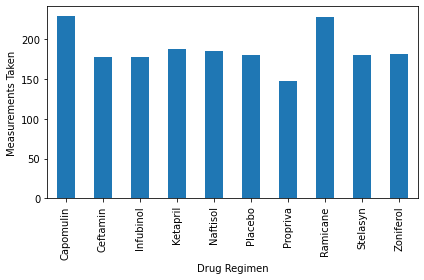

In [19]:
# bar graph one way

bg1 = tumor_table['Count'].plot(kind = 'bar')
bg1.set_ylabel('Measurements Taken')
plt.tight_layout()
plt.show()

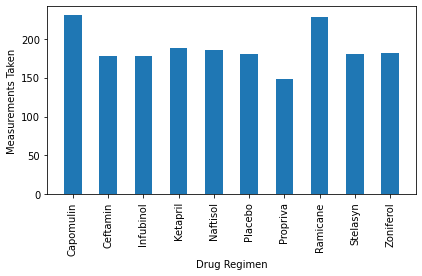

In [80]:
# bar graph two way

x_axis = np.arange(len(tumor_table))
drugs = clean['Drug Regimen'].unique()
drugs = np.sort(drugs)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation = 'vertical', alpha = 1)
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements Taken')
plt.tight_layout()

bg2 = plt.bar(x_axis, tumor_table['Count'], width = .5)